# Adadelta

In addition to RMSProp, Adadelta is another common optimization algorithm that
helps improve the chances of finding useful solutions at later stages of
iteration, which is difficult to do when using the Adagrad algorithm for the
same purpose :cite:`Zeiler.2012`. The interesting thing is that there is no learning rate
hyperparameter in the Adadelta algorithm.

## The Algorithm

Like RMSProp, the Adadelta algorithm uses the variable $\boldsymbol{s}_t$, which is an EWMA on the squares of elements in mini-batch stochastic gradient $\boldsymbol{g}_t$. At time step 0, all the elements are initialized to 0.
Given the hyperparameter $0 \leq \rho < 1$ (counterpart of $\gamma$ in RMSProp), at time step $t>0$, compute using the same method as RMSProp:


$$\boldsymbol{s}_t \leftarrow \rho \boldsymbol{s}_{t-1} + (1 - \rho) \boldsymbol{g}_t \odot \boldsymbol{g}_t. $$

Unlike RMSProp, Adadelta maintains an additional state variable, $\Delta\boldsymbol{x}_t$ the elements of which are also initialized to 0 at time step 0. We use $\Delta\boldsymbol{x}_{t-1}$ to compute the variation of the independent variable:

$$ \boldsymbol{g}_t' \leftarrow \sqrt{\frac{\Delta\boldsymbol{x}_{t-1} + \epsilon}{\boldsymbol{s}_t + \epsilon}}   \odot \boldsymbol{g}_t, $$

Here, $\epsilon$ is a constant added to maintain the numerical stability, such as $10^{-5}$. Next, we update the independent variable:

$$\boldsymbol{x}_t \leftarrow \boldsymbol{x}_{t-1} - \boldsymbol{g}'_t. $$

Finally, we use $\Delta\boldsymbol{x}$ to record the EWMA on the squares of elements in $\boldsymbol{g}'$, which is the variation of the independent variable.

$$\Delta\boldsymbol{x}_t \leftarrow \rho \Delta\boldsymbol{x}_{t-1} + (1 - \rho) \boldsymbol{g}'_t \odot \boldsymbol{g}'_t. $$

As we can see, if the impact of $\epsilon$ is not considered here, Adadelta differs from RMSProp in its replacement of the hyperparameter $\eta$ with $\sqrt{\Delta\boldsymbol{x}_{t-1}}$.


## Implementation from Scratch

Adadelta needs to maintain two state variables for each independent variable, $\boldsymbol{s}_t$ and $\Delta\boldsymbol{x}_t$. We use the formula from the algorithm to implement Adadelta.

In [1]:
import torch
import d2l
from d2l import load_array

def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        p = p.type(torch.FloatTensor)
        s[:] = rho * s + ((1 - rho) * p* p)
        g = ((delta + eps).sqrt() / (s + eps).sqrt()) * (p)
        p[:] -= g
        delta[:] = rho * delta + (1 - rho) * g * g

Then, we train the model with the hyperparameter $\rho=0.9$.

loss: 0.259, 0.075 sec/epoch


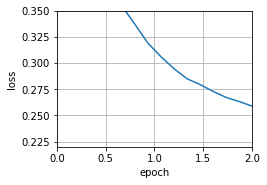

In [2]:
data_iter, feature_dim = d2l.get_data_ch10(batch_size=10)
d2l.train_ch10(torch.optim.Adadelta,  {'rho': 0.9}, data_iter, feature_dim);

## Summary

* Adadelta has no learning rate hyperparameter, it uses an EWMA on the squares of elements in the variation of the independent variable to replace the learning rate.

## Exercises

* Adjust the value of $\rho$ and observe the experimental results.